# Imports

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Data Loading

In [1]:
# Load the Training dataset sheet into a dataframe
training_df = pd.read_excel('/content/Test Data.xlsx', sheet_name='Training Dataset', index_col=False)

# Load the Test dataset sheet into a dataframe
test_df = pd.read_excel('/content/Test Data.xlsx', sheet_name='Test Dataset', index_col=False)

# Display the first few rows of each dataframe to verify
print("Training Dataset:")
print(training_df.head())

print("\nTest Dataset:")
print(test_df.head())



Training Dataset:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  

Test Dataset:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10

In [2]:
training_df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


# Graph Plotting

In [4]:
# Summary statistics for numerical columns
numerical_cols = ['Sourcing Cost']
print("Summary statistics for numerical columns:")
print(training_df[numerical_cols].describe())

Summary statistics for numerical columns:
       Sourcing Cost
count  550176.000000
mean      108.816793
std       104.390097
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.147000
max     32632.500000


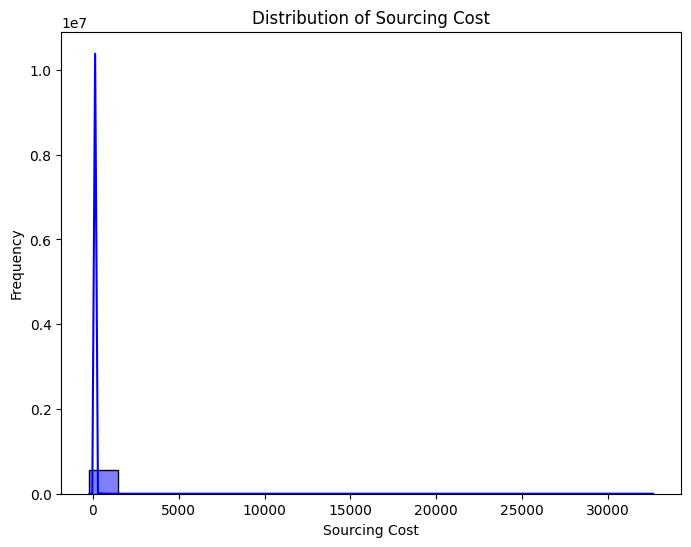

In [5]:
# Histogram for numerical column
plt.figure(figsize=(8, 6))
sns.histplot(training_df['Sourcing Cost'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

<ipython-input-41-fc5679aea927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training_df, x=col, palette='viridis')
<ipython-input-41-fc5679aea927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training_df, x=col, palette='viridis')
<ipython-input-41-fc5679aea927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training_df, x=col, palette='viridis')
<ipython-input-41-fc5679aea927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

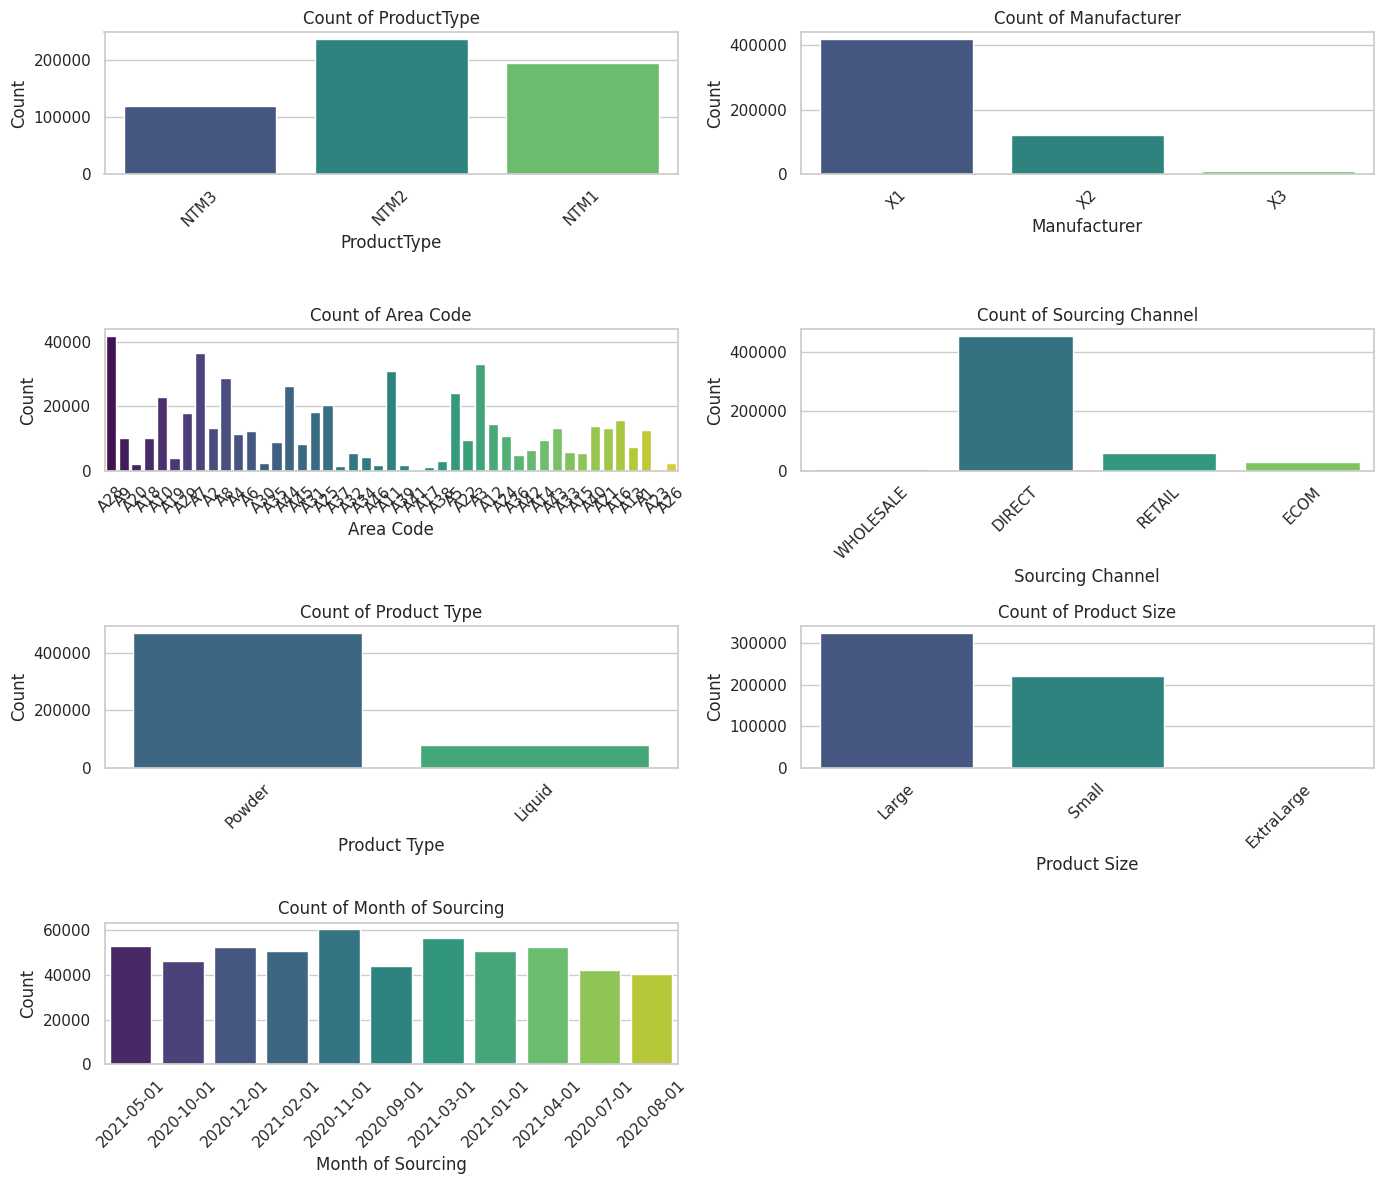

In [41]:
# Count plot for categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel','Product Type', 'Product Size', 'Month of Sourcing']
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(data=training_df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


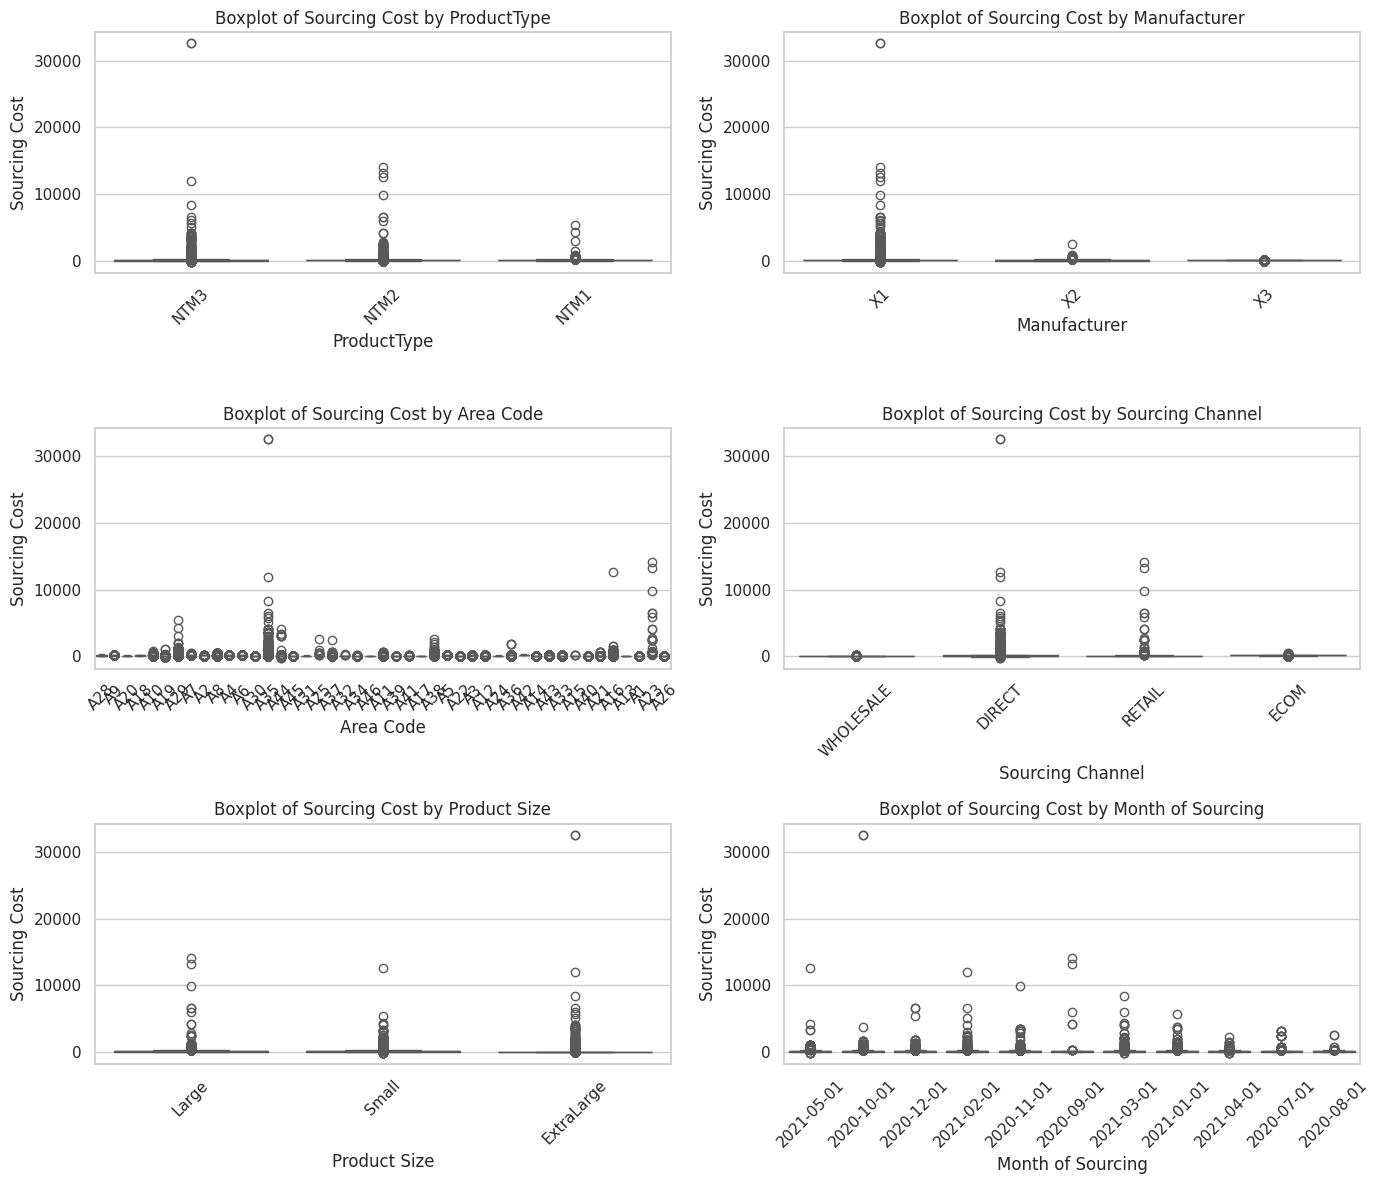

In [33]:
# Set the seaborn plot style and color palette globally
sns.set_theme(style="whitegrid", palette="Set2")

# Boxplot for numerical column against categorical columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=training_df, x=col, y='Sourcing Cost')
    plt.title(f'Boxplot of Sourcing Cost by {col}')
    plt.xlabel(col)
    plt.ylabel('Sourcing Cost')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-39-7dcc718da172>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training_df, x='Product Type', palette='viridis')


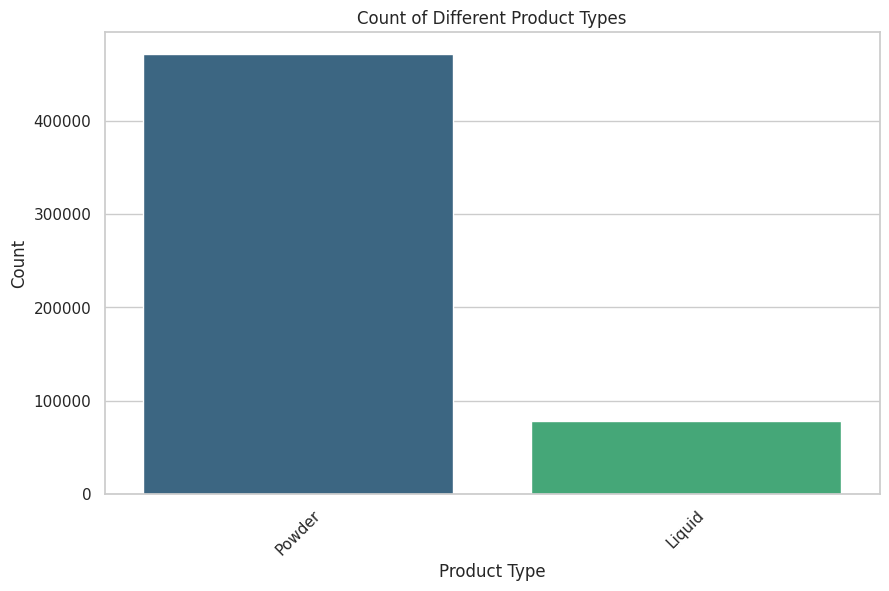

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of different product types
plt.figure(figsize=(10, 6))
sns.countplot(data=training_df, x='Product Type', palette='viridis')
plt.title('Count of Different Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


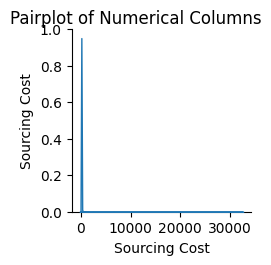

In [8]:
# Pairplot for numerical columns
sns.pairplot(training_df[numerical_cols], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

# Removing Outliers

<ipython-input-22-669019d2ce8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=training_df, y='Sourcing Cost', palette='Set2')


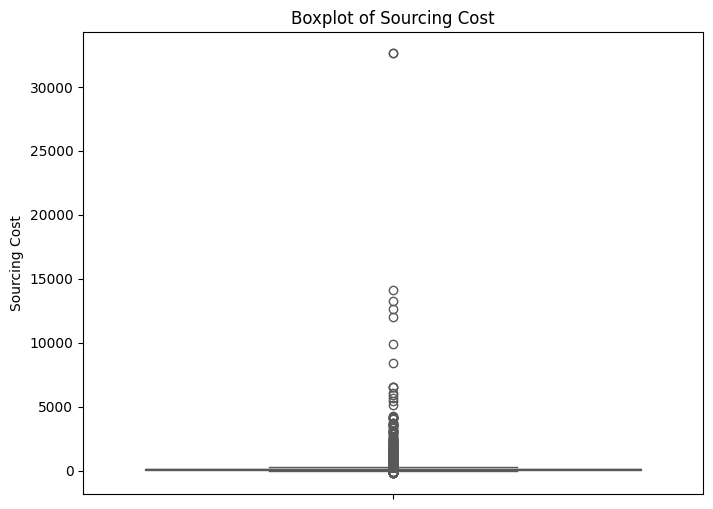

In [22]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=training_df, y='Sourcing Cost', palette='Set2')
plt.title('Boxplot of Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.show()


In [23]:
# Assuming df is your dataframe loaded from an Excel file
# Load the data similar to previous example if it's not yet loaded

# Calculate Q1, Q3, and IQR
Q1 = training_df['Sourcing Cost'].quantile(0.25)
Q3 = training_df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the condition for the outliers
condition = ~((training_df['Sourcing Cost'] < (Q1 - 1.5 * IQR)) | (training_df['Sourcing Cost'] > (Q3 + 1.5 * IQR)))

# Filter the dataframe
df_filtered = training_df[condition]


In [26]:
# Drop rows with 'Sourcing Cost' more than 5000
filtered_df = training_df[training_df['Sourcing Cost'] <= 5000]

# Check the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", filtered_df.shape)
print("Shape of training DataFrame:", training_df.shape)

Shape of filtered DataFrame: (550160, 8)
Shape of training DataFrame: (550176, 8)


<ipython-input-30-1b005f95e86f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, y='Sourcing Cost', palette='Set2')


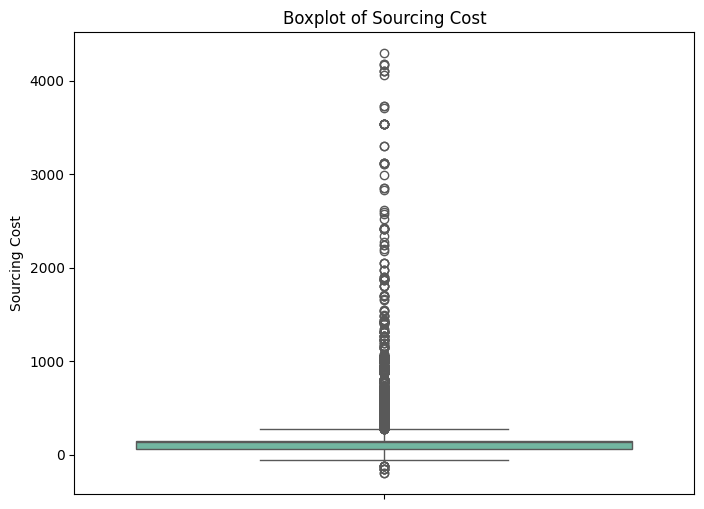

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, y='Sourcing Cost', palette='Set2')
plt.title('Boxplot of Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.show()

In [43]:
filtered_df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


# Plotting after removing some outliers

<ipython-input-45-b2b748545800>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='viridis')
<ipython-input-45-b2b748545800>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='viridis')
<ipython-input-45-b2b748545800>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='viridis')
<ipython-input-45-b2b748545800>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

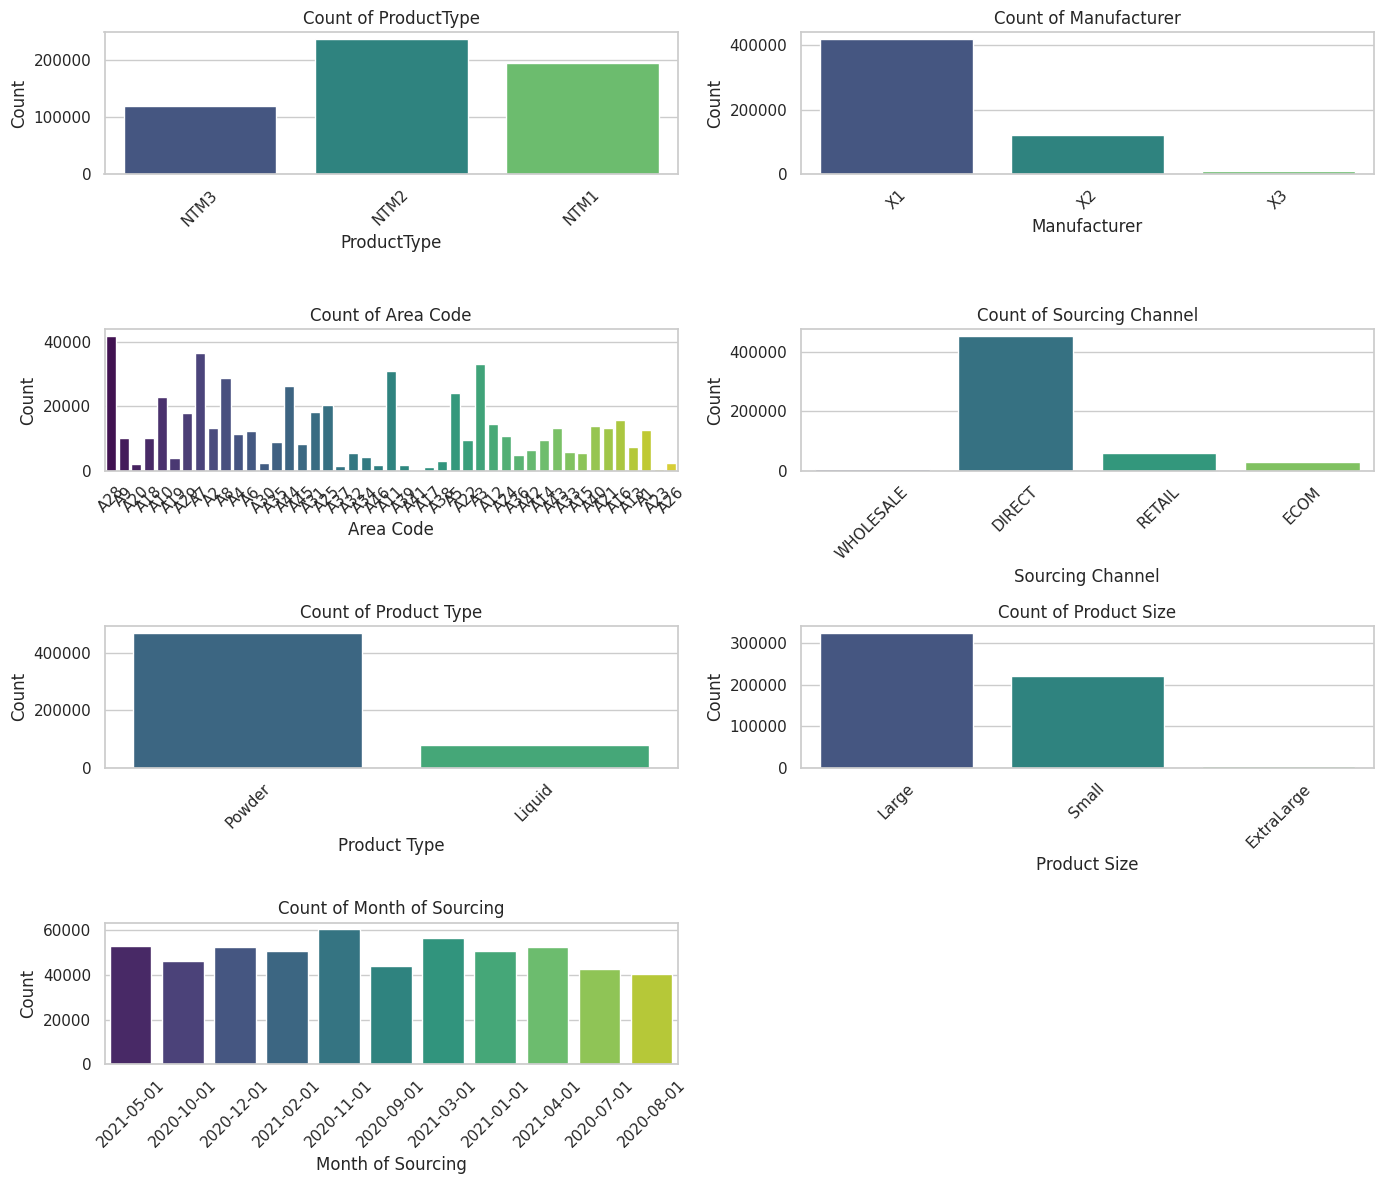

In [45]:
# Count plot for categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel','Product Type', 'Product Size', 'Month of Sourcing']
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(data=filtered_df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


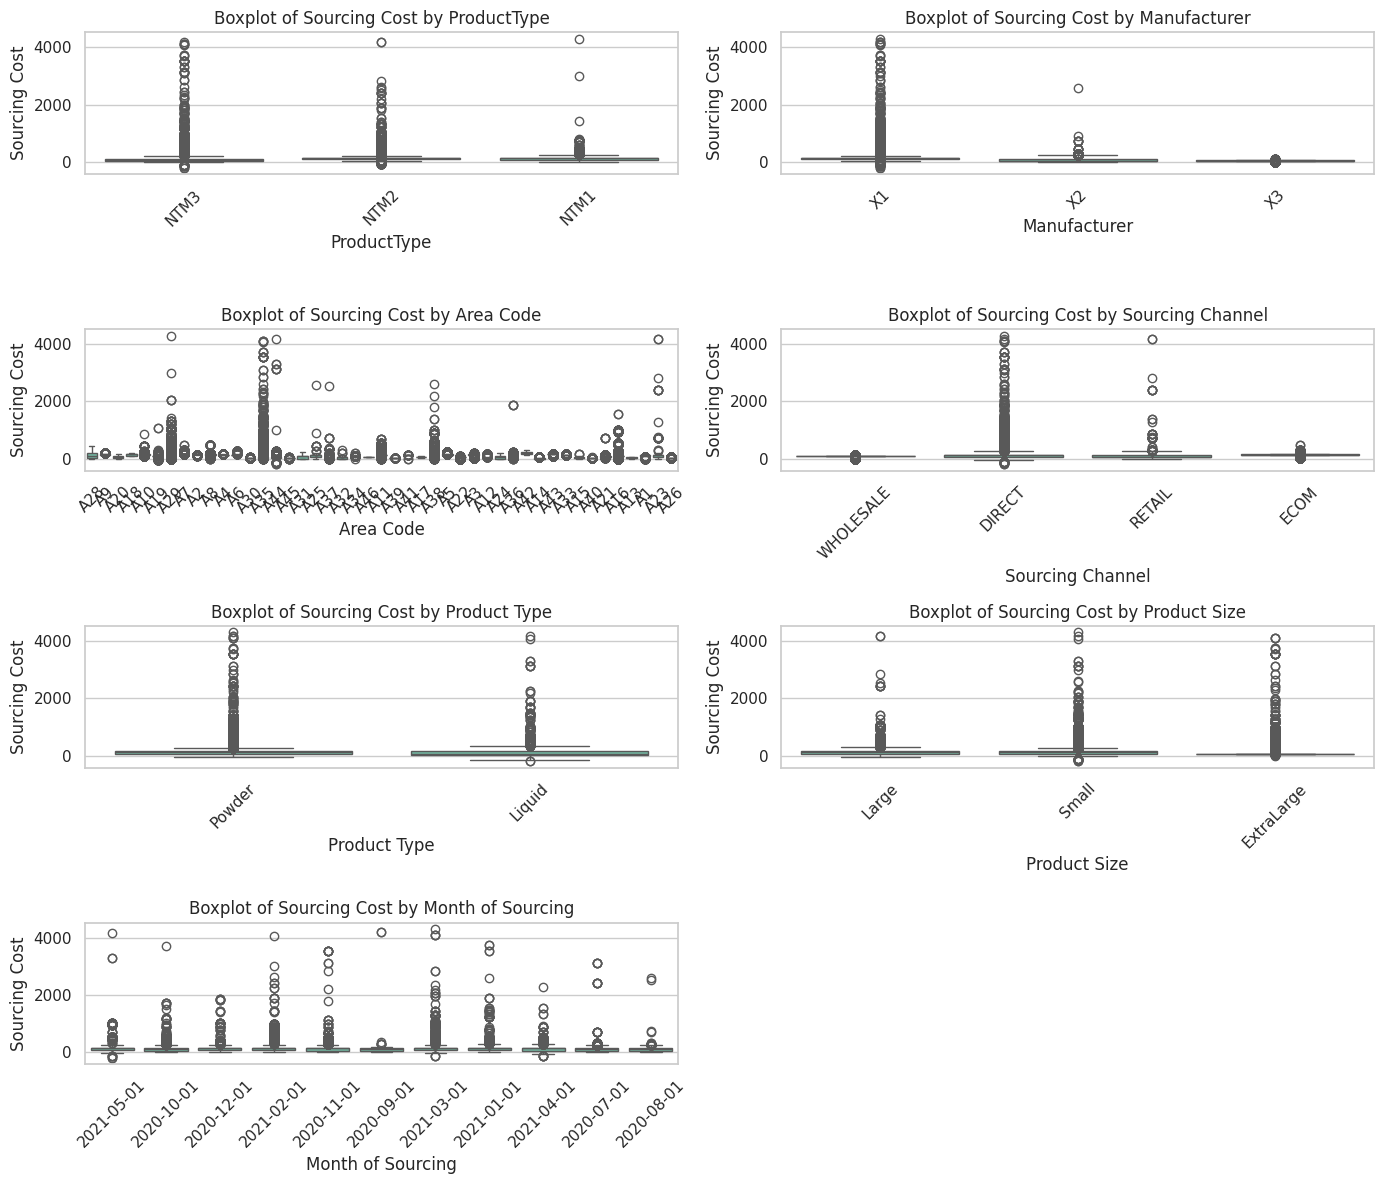

In [47]:
# Set the seaborn plot style and color palette globally
sns.set_theme(style="whitegrid", palette="Set2")

# Boxplot for numerical column against categorical columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=filtered_df, x=col, y='Sourcing Cost')
    plt.title(f'Boxplot of Sourcing Cost by {col}')
    plt.xlabel(col)
    plt.ylabel('Sourcing Cost')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Applying ML Models

In [11]:
# Exclude 'Month of Sourcing' from features
X = pd.get_dummies(filtered_df.drop(columns=['Sourcing Cost', 'Month of Sourcing']), drop_first=True)
y = filtered_df['Sourcing Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 3147.848437111236
R-squared (R2) Score: 0.44672275830812


In [12]:
y_pred

array([148.75877953, 143.96698283,  24.53253768, ...,  24.53253768,
       155.94158327, 171.44436555])

In [14]:

# Separate features and target
X = filtered_df.drop('Sourcing Cost', axis=1)
y = filtered_df['Sourcing Cost']

# Handling categorical variables with OneHotEncoder
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
numeric_features = []



In [15]:
# Specify the columns that are categorical
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']

# Make sure that all categorical features are of type 'object' for one-hot encoding
X[categorical_features] = X[categorical_features].astype(str)

# Create a Column Transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')  # 'remainder' parameter is set to 'passthrough' for numeric features not listed

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3052.4063658340583


In [16]:

rmse = np.sqrt(mse)

In [17]:
rmse

55.24858700305428

In [18]:
y_pred

array([153.51168874, 147.58062487,  24.90903745, ...,  24.60154366,
       150.80933546, 174.828     ])

In [21]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', model)])

# Fit and evaluate each model
for name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse= np.sqrt(mse)
    print(f"{name} Mean Squared Error:", mse)
    print(f"{name} Root Mean Squared Error:", rmse)
    print("R-squared (R2) Score:", r2)



Linear Regression Mean Squared Error: 3307.355140829416
Linear Regression Root Mean Squared Error: 57.50960911734157
R-squared (R2) Score: 0.4186872823861768
Ridge Regression Mean Squared Error: 3307.304540614123
Ridge Regression Root Mean Squared Error: 57.50916918730545
R-squared (R2) Score: 0.4186961760632726
Gradient Boosting Regression Mean Squared Error: 3298.4206005291585
Gradient Boosting Regression Root Mean Squared Error: 57.43187791226366
R-squared (R2) Score: 0.420257649547071


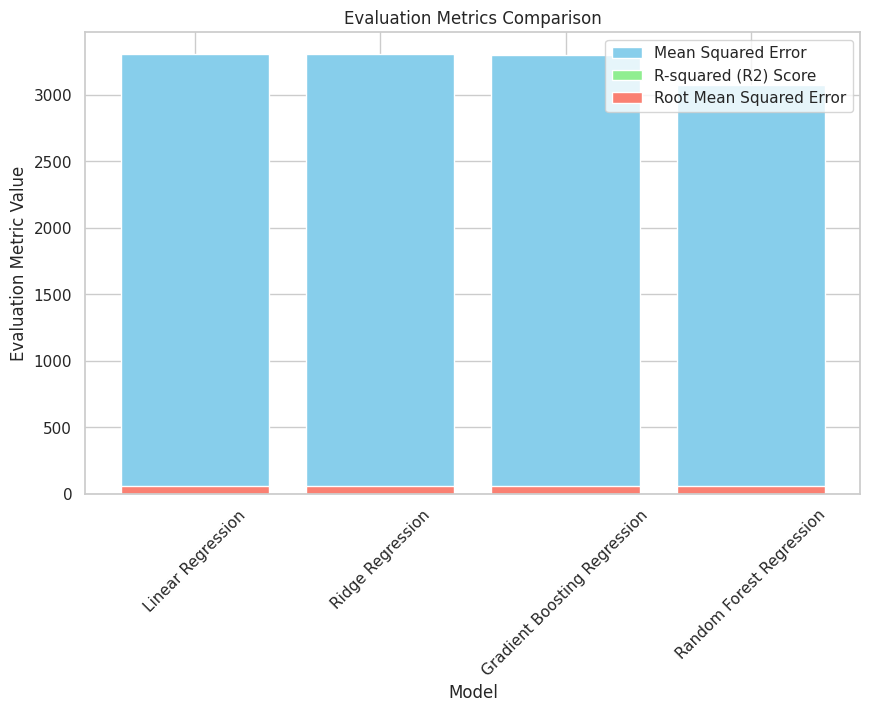

In [35]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', model)])

# Define lists to store evaluation metrics
mse_values = []
r2_values = []
rmse_values = []

# Fit and evaluate each model
for name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the evaluation metrics
    mse_values.append(mse)
    r2_values.append(r2)
    rmse_values.append(rmse)

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mse_values, color='skyblue', label='Mean Squared Error')
plt.bar(models.keys(), r2_values, color='lightgreen', label='R-squared (R2) Score')
plt.bar(models.keys(), rmse_values, color='salmon', label='Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Evaluation Metric Value')
plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


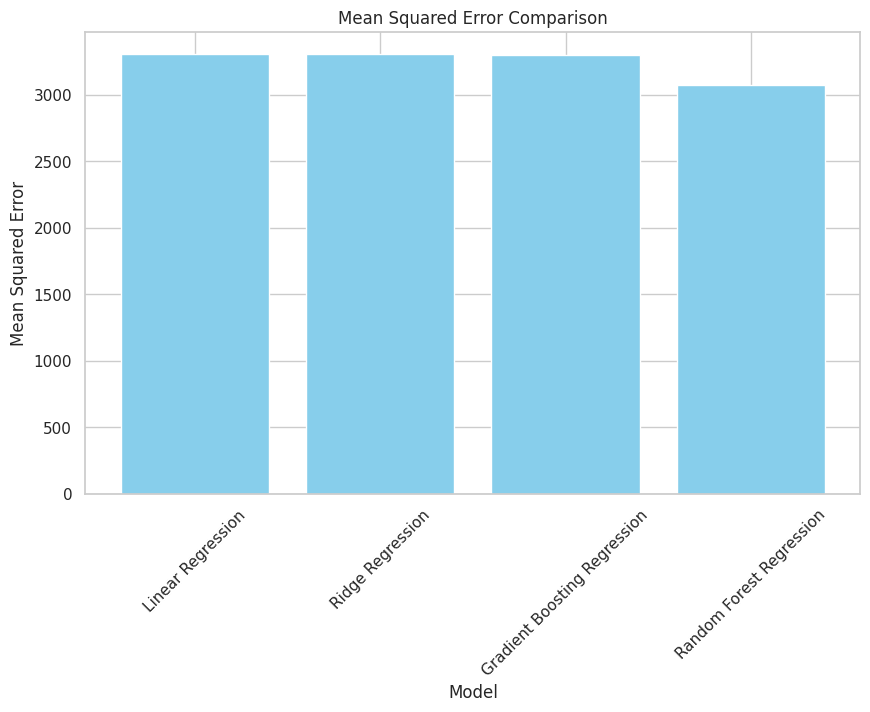

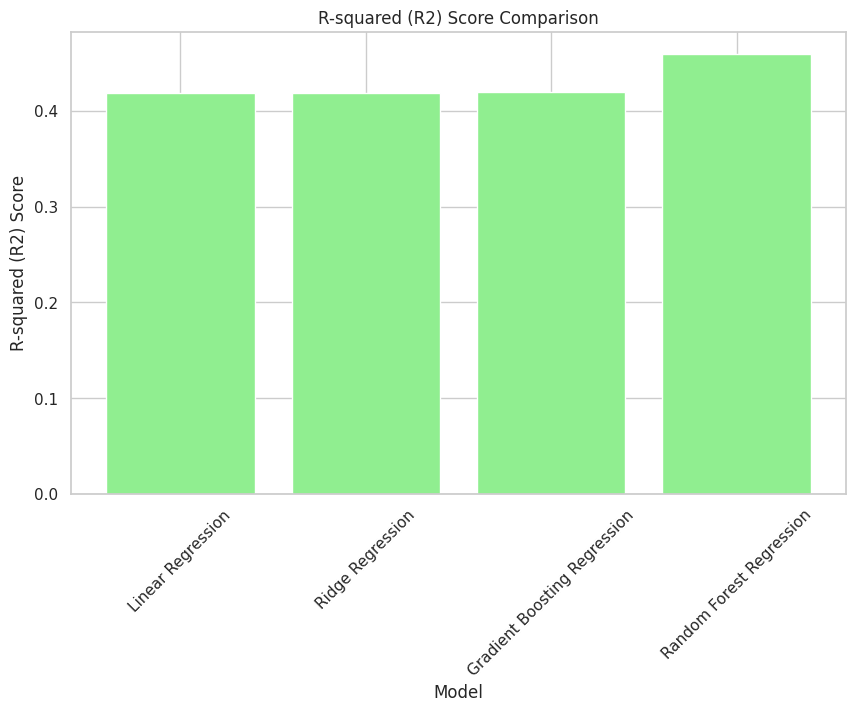

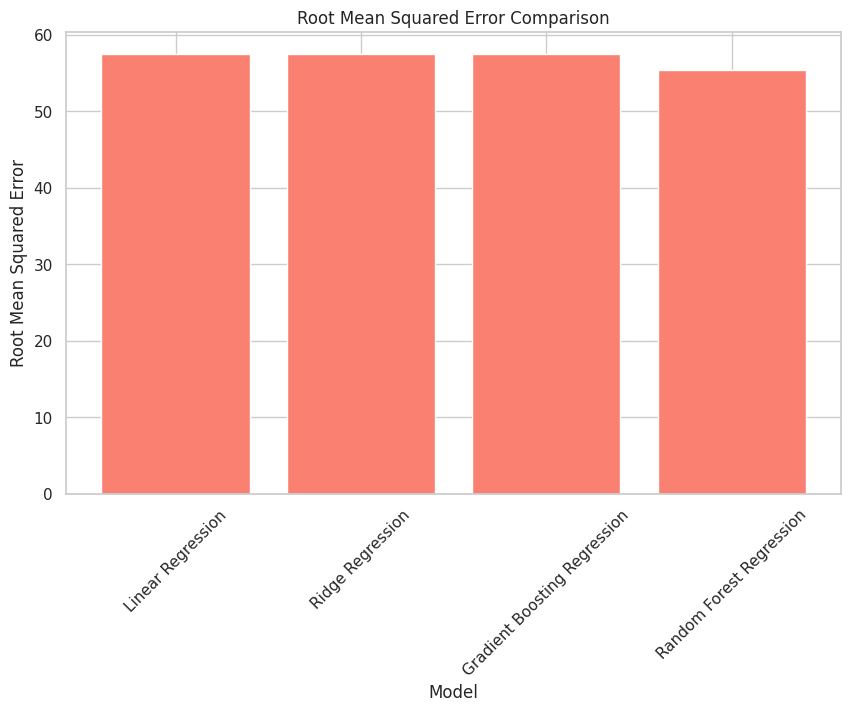

In [36]:
# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared (R2) Score
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), r2_values, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('R-squared (R2) Score Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot Root Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), rmse_values, color='salmon')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error Comparison')
plt.xticks(rotation=45)
plt.show()
